<a href="https://colab.research.google.com/github/NidhiSingh25901/MLAlgorithm/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# #Project Face Recoginition
# 1.Collect Data of various person -asking multiple people to come in front of webcam, click 20 each pictures each
# 2.Train a classifier to learn who is the person (classification)
# 3. Predicting the name of the person

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

In [3]:
print(x.shape)

(500, 2)


In [4]:
np.unique(y)

array([0, 1, 2, 3, 4])

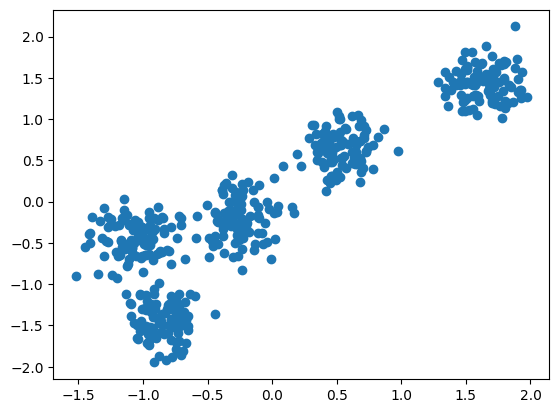

In [7]:
#Data Visualization
def normalize(x):
  u=x.mean(axis=0)
  std = x.std(axis=0)
  return (x-u)/std

x=normalize(x)

plt.scatter(x[:,0], x[:,1])

In [10]:
#Init the k-ceners for k clusters

k=5
colors = ["green","red","blue","yellow","orange"]

n_features = 2
centroids = {}

for i in range(k):
  center = (2*np.random.random((2,))-1)

  centroids[i] = {
      'center' : center,
      'color': colors[i],
      'points': []
  }
  print(centroids)


{0: {'center': array([-0.7171451 , -0.95998258]), 'color': 'green', 'points': []}}
{0: {'center': array([-0.7171451 , -0.95998258]), 'color': 'green', 'points': []}, 1: {'center': array([0.22728327, 0.2202659 ]), 'color': 'red', 'points': []}}
{0: {'center': array([-0.7171451 , -0.95998258]), 'color': 'green', 'points': []}, 1: {'center': array([0.22728327, 0.2202659 ]), 'color': 'red', 'points': []}, 2: {'center': array([0.44128142, 0.99792409]), 'color': 'blue', 'points': []}}
{0: {'center': array([-0.7171451 , -0.95998258]), 'color': 'green', 'points': []}, 1: {'center': array([0.22728327, 0.2202659 ]), 'color': 'red', 'points': []}, 2: {'center': array([0.44128142, 0.99792409]), 'color': 'blue', 'points': []}, 3: {'center': array([-0.42729877,  0.70692367]), 'color': 'yellow', 'points': []}}
{0: {'center': array([-0.7171451 , -0.95998258]), 'color': 'green', 'points': []}, 1: {'center': array([0.22728327, 0.2202659 ]), 'color': 'red', 'points': []}, 2: {'center': array([0.44128142,

In [13]:
def dist(p,q):
  return np.sqrt(np.sum((p-q)**2))
def assignPtsToCluster(x,centroids):
  m = x.shape[0]
  for i in range(m):
    cdist = []
    cx = x[i]
    #find out distance of pt from each centroid
    for kx in range(k):
      d = dist(centroids[kx]['center'], cx)
      cdist.append(d)
    current_cluster = np.argmin(cdist)
    centroids[current_cluster]['points'].append(cx)



In [16]:
def updateCluster(centroids):
  #Update every centroid by taking a mean of pints assigned to the cluster
  for kx in range(k):
    pts = np.array(centroids[kx]['points'])

    if pts.shape[0] >0:
      newCenter = pts.mean(axis=0)
      centroids[kx]['center'] = newCenter
      centroids[kx]['points'] = []
  return centroids


In [24]:
#Visualize the function
def plotClusters(centroids, k):
  for kx in range(k):
    pts = np.array(centroids[kx]['points'])

    #Plot the Points
    if(pts.shape[0] > 0):
      plt.scatter(pts[:,0], pts[:,1], color=centroids[kx]['color'])

    #Plot the cluster
    uk = centroids[kx]['center']
    plt.scatter(uk[0], uk[1], color=centroids[kx]['color'], marker='x')

{0: {'center': array([-0.88261177, -0.89570955]),
  'color': 'green',
  'points': []},
 1: {'center': array([0.19524203, 0.10906868]), 'color': 'red', 'points': []},
 2: {'center': array([1.20376297, 1.16695653]), 'color': 'blue', 'points': []},
 3: {'center': array([-1.15057697,  0.03816438]),
  'color': 'yellow',
  'points': []},
 4: {'center': array([-0.33452989, -0.01003839]),
  'color': 'orange',
  'points': []}}

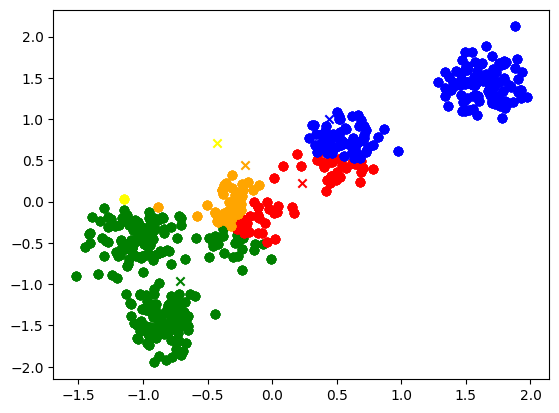

In [27]:
assignPtsToCluster(x,centroids)
plotClusters(centroids, k)
updateCluster(centroids)